# Natural Language Processing

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for i in range(0, len(dataset)):

  #Removing the ' in words like aren't and isn't
  review = re.sub(r"'", "", dataset['Review'][i])
  review = re.sub(r"[^a-zA-Z]", " ", review)

  #Changing the words to lower case and splitting them
  review = review.lower()
  review = review.split()

  #Stemming
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  for word in ['not', 'no']:
    all_stopwords.remove(word)
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti didnt tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'that right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found plac

## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

##Finding the best model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Instantiating the Classification Models
models = {
      'Random Forest': RandomForestClassifier(),
      'Logistic Regression': LogisticRegression(max_iter=600),
      'SVM': SVC(),
      'KNN': KNeighborsClassifier(),
      'Naive Bayes': GaussianNB(),
      'Decision Tree': DecisionTreeClassifier(),
  }

results = []

#Trainning and evaluating each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    report_train = classification_report(y_train, y_pred_train, output_dict=True)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    results.append({
        'Model': name,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,
        **report_train['weighted avg'],
        **report_test['weighted avg']
    })

# Creatting a dataframe with the results
df_results = pd.DataFrame(results)

# Ordenating the dataframe by test accuracy
df_results_sorted = df_results.sort_values(by='Test Accuracy', ascending=False)

# Styling the dataframe
def style_format(val):
    if val == df_results_sorted.iloc[0]['Model']:
        color = 'green'
    elif val == df_results_sorted.iloc[1]['Model']:
        color = 'yellow'
    elif val == df_results_sorted.iloc[2]['Model']:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}; text-align: left;'

styled_df = df_results_sorted.style.applymap(style_format, subset=['Model'])
styled_df

<ipython-input-198-9a9c22a2c23d>:59: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_results_sorted.style.applymap(style_format, subset=['Model'])


,Model,Train Accuracy,Test Accuracy,precision,recall,f1-score,support
0,Random Forest,1.000000,0.825000,0.826075,0.825000,0.825022,200.000000
1,Logistic Regression,0.975000,0.815000,0.816065,0.815000,0.815023,200.000000
2,SVM,0.983750,0.810000,0.823943,0.810000,0.808663,200.000000
5,Decision Tree,1.000000,0.775000,0.775450,0.775000,0.775051,200.000000
4,Naive Bayes,0.927500,0.735000,0.754450,0.735000,0.728063,200.000000
3,KNN,0.836250,0.675000,0.678211,0.675000,0.674553,200.000000


## Training the Model on the Training set

In [ ]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = model.predict(x_test)
result = np.concatenate(
    (y_pred.reshape(len(y_pred), 1),
    y_test.reshape(len(y_test), 1)),
    1
    )

## Ploting the Confusion Matrix

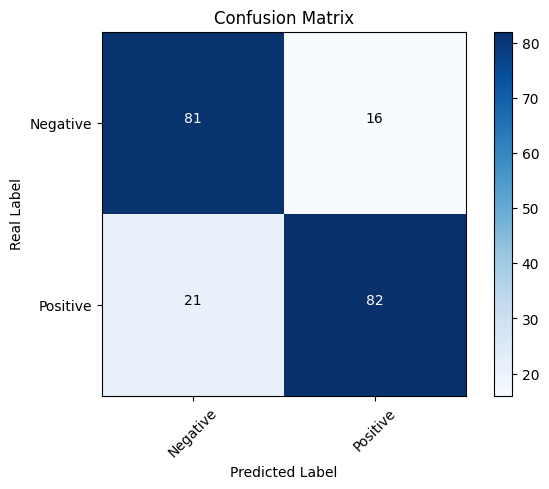

In [ ]:
def plotMatriz(classificador, y, y2, cmap = plt.cm.Blues, normalize = False):
  from sklearn.metrics import confusion_matrix
  import itertools
  cm = confusion_matrix(y, y2)
  classes = ['Negative', 'Positive']
  title = 'Confusion Matrix'

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Real Label')
  plt.xlabel('Predicted Label')

plotMatriz(model, y_test, y_pred)

##Showing the Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        97
           1       0.84      0.80      0.82       103

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

